Import all nessesary libarys

In [19]:
import numpy as np
#import cupy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline

Definitions of all interchangeable variables of the script

In [20]:
# Definitions

# Matrix size

matrix_width = 50
matrix_height = 50

# Grayscale value range

gray_value_min = 0
gray_value_max = 2

# values --> used for würfeln.. has to be merged with grayscale_value_range

#values = [-1,1]

# dampening factor

beta = 2

#itterations

itteration = 10

# definition Mask

mask = np.array([
        [-0.81,0,0,0,-0.81],
        [0,0.91,0.4,0.91,0],
        [0,0.4,0,0.4,0],
        [0,0.91,0.4,0.91,0],
        [-0.81,0,0,0,-0.81]
       ])

applys the mask to the selected data point of the matrix

In [48]:
def apply_mask(height,width, matrix, mask):
    # create a copy of the matrix in the area of the mask
    matrix_slice = matrix.take(range((height - (mask.shape[0]-1)//2),(height + (mask.shape[0]+1)//2)),mode='wrap', axis=0).take(range((width - (mask.shape[1]-1)//2),(width + (mask.shape[1]+1)//2)),mode='wrap',axis=1)
    #print (matrix_slice)
    # calculate the probability of a data point to flip
    xk = np.arange(gray_value_max)
    print(xk)
    pk = [0,0]
    #print (matrix[height][width])
    #for i in xk:
    pk[matrix[height][width]]= 1 / (1 + np.exp(-beta * np.sum(mask * np.absolute(matrix[height][width] - matrix_slice))))
    pk = np.where(pk == 0, 1-pk[matrix[height][width]], pk)
    print(pk)
    #use np.random.choice instead
    np.random.choice(a= xk, p= pk)
    #if binom.rvs(1,p=probability): 
     #   matrix[height][width] = -matrix[height][width]
    return matrix
    

generate Matrix of white noise

CPU times: user 33 ms, sys: 833 µs, total: 33.8 ms
Wall time: 28.6 ms


array([[0, 1, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]])

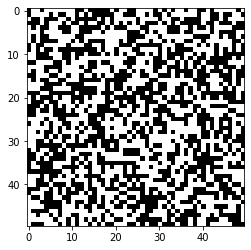

In [49]:
%%time
# generate Matrix of white noise
matrix = np.random.randint(gray_value_min,gray_value_max,size=(matrix_height,matrix_width))
# replaces 0 in the matrix with -1s (nessesary for a few masks)
#matrix = np.where(matrix == 0, -1, matrix)
# Print matrix as Image
plt.imshow(matrix,cmap='gray',vmin=gray_value_min, vmax=gray_value_max-1)
# Return (and print) matrix
matrix

In [50]:
matrix = np.load('matrix.npy')

apply mask to whole matrix

In [51]:
%%time
# itterate thrue the whole matrix and appy mask
counter = 0
np.random.seed(0)
while counter < itteration:
    counter += 1
    for h in range(0, matrix.shape[0]):
        for w in range(0, matrix.shape[1]):
            matrix = apply_mask(h, w, matrix, mask) #faster with inplace ?

[0 1]
[0.72710822 0.        ]


ValueError: probabilities do not sum to 1

plot new matrix

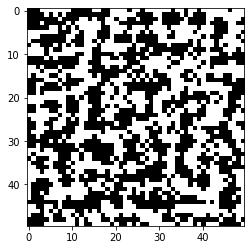

In [25]:
plt.imshow(matrix,cmap='gray',vmin=gray_value_min, vmax=gray_value_max-1)

safe new matrix to file

In [35]:
np.save("matrix", matrix)

Fragen für Mittwoch:
Formel (was liegt mit in der summe? O.o)
        e^-2 abhängigkeit zu anz graustufen
        mehrere pixel zeitgleich angucken (maske gerade anzahl (8x8 oder so mit 4 mittleren pixeln)
        exponenten ersetzen.. wie genau soll ich das umsetzen? O.o
        und wo genau brauch ich fakultäten